## 데이터 및 컬럼 그리고 형태 확인

In [ ]:
import pandas as pd
import pyarrow as pa

In [3]:
df = pd.read_parquet(r"unlabeled\00c4c9313d.parquet")
print(df.shape)
df.head()

(69722389, 4)


,Time,AccV,AccML,AccAP
0,0,0.328125,-0.109375,0.671875
1,1,0.453108,-0.124721,0.811273
2,2,0.423042,-0.264046,0.921238
3,3,0.150015,-0.310241,0.937483
4,4,-0.202003,-0.545908,0.890842


In [5]:
de_df = pd.read_csv(r"train\defog\0c55be4384.csv")

print(de_df.shape)
de_df.head()

(122506, 9)


,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-1.017303,0.105948,-0.067194,0,0,0,False,False
1,1,-1.019972,0.105369,-0.068920,0,0,0,False,False
2,2,-1.017942,0.103586,-0.069410,0,0,0,False,False
3,3,-1.017090,0.102103,-0.070308,0,0,0,False,False
4,4,-1.017065,0.104719,-0.070091,0,0,0,False,False


In [13]:
cols = de_df.columns
de_df[cols[4:]].sum()

StartHesitation        0
Turn               10852
Walking              669
Valid              25949
Task               26968
dtype: int64

In [7]:
not_df = pd.read_csv(r"train\notype\0a900ed8a2.csv")

print(not_df.shape)
not_df.head()

(200036, 7)


,Time,AccV,AccML,AccAP,Event,Valid,Task
0,0,-0.876855,-0.071298,0.473350,0,False,False
1,1,-0.877627,-0.071626,0.472676,0,False,False
2,2,-0.876412,-0.072453,0.473145,0,False,False
3,3,-0.877211,-0.073387,0.473575,0,False,False
4,4,-0.878722,-0.072186,0.474908,0,False,False


In [14]:
cols = not_df.columns
not_df[cols[4:]].sum()

Event        0
Valid    73348
Task     73378
dtype: int64

In [9]:
tdcs_df = pd.read_csv(r"train\tdcsfog\0a89f859b5.csv")

print(tdcs_df.shape)
tdcs_df.head()

(9155, 7)


,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.495592,-0.906945,-0.336843,0,0,0
1,1,-9.488013,-0.899195,-0.337950,0,0,0
2,2,-9.492908,-0.904170,-0.343041,0,0,0
3,3,-9.501896,-0.906277,-0.338515,0,0,0
4,4,-9.495207,-0.911066,-0.343226,0,0,0


In [15]:
cols = tdcs_df.columns
tdcs_df[cols[4:]].sum()

StartHesitation      0
Turn               448
Walking              0
dtype: int64

## 사전에 그 뭐냐 정보 찾아두는거
[Parkinson's Freezing of Gait Prediction-Data](https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction/data)

FOG(Freezing of Gait): 환자가 걸으려 하면 발이 마치 바닥에 붙어 있는 것처럼 음직이지 않는 현상
이 대회는 FOG를 예측/탐지하는 모델을 만드는것이 목표

주 데이터는 허리에 부착된 3축 가속도계(수직, 좌우, 앞뒤)의 시간에 따른 시계열 형태
데이터는 실험(train) 또는 세션(session)으로 나누어져 있음 

각 FOG가 언제 시작되었는지, 언제 끝났는지 정보가 라벨링 되어있음

FOG는 3가지의 유형으로 구분
1. Start Hesitation: 출발 머뭇거림
2. Turn: 회전 시 동결
3. Walking: 걷는 도중 느려지거나 작은 걸음, 극단적 보폭 감소

언제 어떤 유형의 FOG가 일어나는지 예측해야함

1. FOG 사건 감지 및 분류 주로 mAP를 평가지표로 사용
2. 운동(예: 떨림, 강직, 인지 관련 등) 증상/ 비운동 증상 분류 하지만 이 과제는 주요 과제는아님

매우 어려운 과제, 1379개의 팀이 참가를 하였고 1등 점수가 0.514025, 동매달은 0.283192까지
어떤 논문에서 transformer + Bi-LSTM 혼합모델로 사용하여 mAP에서 0.427수준을 달성



tdcsfog: 피험자들이 FOG현상을 유발하도록 설계된 실험 프로토콜을 수행하는 동안 수집된 시계열 데이터,
        통제된 조건하에 수집되어 잡음이 적고 라벨 품질이 높음

defog: 피험자들이 FOG를 유발하는 일상 과제를 수행하는 동안 수집된 데이터, 
        센서 노이즈나 활동 다양성이 더 크지만 실제 상황에 가까운 특성을 가짐

notype: defog 데이터의 일부지만, 이벤트 유형이 존재하지 않음

unlabeled: 일상생활 중 24시간 연속 측정 65명의 피험자에게서 일주일동안 연속적으로 수집된 데이터
        45명은 FOG 증상을 보이며 이들은 defog 데이터셋에도 포함되어 있음
        나머지 20명은 FOG 증상이 없으며 다른 데이터셋에는 포함되지 않으 
        매우 긴 시계열 데이터로 구성, 주석이 없는 비라벨 데이터


주석 정보: 모든 실험은 비디오로 녹화되어 전문가가 주석을 달았음
        전문가들은 각 FOG 에피소드의 시작 시점, 종료 시점, 유형을 직접 마킹
        마킹이 존재하는 데이터는 라벨이 존재하는 감독학습용 데이터
        반면 daily 데이터셋은 라벨이 없음으로 비지도, 준지도 기법을 적용해 FOG 탐지 모델 보완에 사용


Time: 정수형 시간 스텝, tdscfog - 128Hz, defog/daily - 100Hz

가속도(tdscfog - m/s^2, defog/daily - g)
AccV: 수직가속
AccML: 좌우가속도
AccAP: 앞뒤가속도

StartHesitation, Turn, Walking: 발생여부
Event: 어떤 형태의 FOG가 발생

Valid: 주석 품질 표시 True - 명확한 FOG 에피소드, False - 전문가가 단순 정지인지 FOG인지 판단이 어려운 경우 -> 학습 여부 확인 요망
Task: 해당 시점이 실제 태스크 수행중인지 여부 True-주석구간, False-비주석 구간


test 데이터 제공 컬럼: Time, AccV, AccML, AccAP, 라벨(StartHesitation, Turn, Walking, Event, Valid, Task)은 숨겨져 있음
                      평가시 숨겨진 Valid/Task가 점수 계산에 반영


tdcsfog_metadata.csv: tdcsfog 데이터 각 시리즈의 정보
                컬럼: Subject, Visit, Test, Medication
defog_metadata.csv: defog 데이터 각 시리즈의 정보
                컬럼: Subject, Visit, Medication
daily_metadata.csv:	daily 데이터 각 시리즈 정보
                컬럼: Subject, StartTime (녹화 시작 시각)
subjects.csv: 모든 피험자 공통 정보
            • Age, Sex
            • Visit: defog, daily 피험자만 존재
            • YearsSinceDx: 파킨슨 진단 후 경과 연수
            • UPDRSIIIOn / UPDRSIIIOff: 약물 복용 중/중단 중 점수
            • NFOGQ: FOG 자가 설문 점수 ([참고 논문](https://pubmed.ncbi.nlm.nih.gov/19660949/))
events.csv:	모든 데이터 시리즈의 FOG 이벤트 주석 정보
            컬럼:
            • Id: 해당 시리즈 ID
            • Init Time (s): FOG 시작 시각
            • Completion Time (s): FOG 종료 시각
            • Type: FOG 유형 (StartHesitation, Turn, Walking)
            • Kinetic: 운동 중(1)/무운동(0) 상태
tasks.csv: defog 데이터의 태스크 메타데이터 (tdcsfog, daily에는 해당 없음)
            컬럼:
            • Id, Begin Time (s), End Time (s)
            • Task: 7가지 태스크 중 하나 (자세한 설명은 대회 페이지 참고)
sample_submission.csv:	정답 제출 양식 (제출 형식 참고용)



참고 영상

[Parkinsonian Gait Demonstration](https://youtu.be/j86omOwx0Hk) - Short demonstration of FOG events.
[Freezing of gait from The Lancet](https://youtu.be/3-wrNhyVTNE) - Patient showing FOG events during a test.
[Multitarget tDCS for Freezing of Gait in Parkinson’s Disease](https://www.youtube.com/watch?v=RX3dzd8Lkeo) - Example of a FOG provoking test.
[Freezing of Gait & Interventions For Freezing Triggers](https://youtu.be/uqgqfLCdhOc) - See 7:20 for descriptions of the event types.
[Gait impairments in Parkinson's disease](https://youtu.be/pFLC9C-xH8E)
[Cycling for Freezing Gait in Parkinson's Disease](https://youtu.be/aaY3gz5tJSk)
[Parkinson's Freezing of Gait - Before and After Exercise](https://youtube.com/shorts/SnVwWLAh11M?feature=share)
[Parkinson's Disease Freezing & Festinating Gait](https://youtu.be/EQ0HG16EC3g)
[Parkinson's Disease: Freezing of Gait - Parkinsonism and Related](https://youtu.be/FumLR_wAfpk)

#### CSV를 딕셔너리 형태로 보관
*   딕셔너리 구조
```
## 데이터 구조 요약
tdcsfog(833건, 443MB)
defog(93건, 952MB)
notype(46건, 741MB)

dfs = {
    "tdcsfog": {
        "td_<csv파일이름>_df": DataFrame,
        "td_<csv파일이름>_df": DataFrame,
        ...
    },

    "defog": {
        "de_<csv파일이름>_df": DataFrame,
        "de_<csv파일이름>_df": DataFrame,
        ...
    },

    "notype": {
        "no_<csv파일이름>_df": DataFrame,
        "no_<csv파일이름>_df": DataFrame,
        ...
    }
}

```

In [35]:
import os
import pandas as pd


In [36]:
base_path = os.path.join("train", "tdcsfog")

base_name_2f = os.path.basename(base_path)[:2]

csv_files = sorted([f for f in os.listdir(base_path) if f.endswith(".csv")])

dfs: dict[str, pd.DataFrame] = {}

for f in csv_files:
    name, _ = os.path.splitext(f)
    var_name = f'{base_name_2f}_{name}_df'
    df = pd.read_csv(os.path.join(base_path, f))
    dfs[var_name] = df



In [37]:
print(len(dfs.keys()))
print(dfs.keys())

833
dict_keys(['td_003f117e14_df', 'td_009ee11563_df', 'td_011322847a_df', 'td_01d0fe7266_df', 'td_024418ba39_df', 'td_024ba3ebd5_df', 'td_02e8454f57_df', 'td_02edc527c0_df', 'td_0330ea6680_df', 'td_0383be6b43_df', 'td_03bb0c0c46_df', 'td_03c9d8dbfa_df', 'td_03e7159bcc_df', 'td_0494003044_df', 'td_04b449020a_df', 'td_04c2e97800_df', 'td_04e10e0797_df', 'td_0506d9a39f_df', 'td_0526a6a0fd_df', 'td_052a913d06_df', 'td_053e7a7261_df', 'td_0561a4912c_df', 'td_05e892544d_df', 'td_06228cf84a_df', 'td_06422a906e_df', 'td_066f785ce0_df', 'td_0727c3a6a8_df', 'td_07bd2e7fbc_df', 'td_08cb8d3129_df', 'td_08d6702e8a_df', 'td_08db3a6ad8_df', 'td_08e8e06116_df', 'td_08fbe142f9_df', 'td_091c246bd1_df', 'td_09575b5dae_df', 'td_0974bf9e9f_df', 'td_099362b821_df', 'td_0a89f859b5_df', 'td_0b067c4b09_df', 'td_0b26b0d64f_df', 'td_0b2b9bc455_df', 'td_0b36680dd2_df', 'td_0b684505f4_df', 'td_0b73d30dee_df', 'td_0b77238a70_df', 'td_0bcd4db9cc_df', 'td_0c4742dfa9_df', 'td_0c7b7078a3_df', 'td_0c98e4bfe5_df', 'td_0

In [38]:
from __future__ import annotations
import os
from pathlib import Path
from typing import Iterable, Dict, Optional
import pandas as pd
import numpy as np

def load_csv_to_dfs(
        root = None,
        folders = None,
        suffix = ".csv",
        max_files_loads = None
        ):
    root = Path(root)

    if folders is None:
        folders = [p.name for p in root.iterdir() if p.is_dir()]
    
    dfs: Dict[str, Dict[str, pd.DataFrame]] = {}

    for folder in folders:

        prefix = folder[:2]
        folder_path = root / folder
        
        if not folder_path.exists():
            print(f"하위 폴더 없음:{folder_path}")
            continue

        files = [p for p in folder_path.glob(f"*{suffix}") if p.is_file()]
        files = sorted(files, key=lambda p: p.name)

        if max_files_loads is not None:
            files = files[:max_files_loads]

        dfs[folder] = {}

        for fp in files:
            name = fp.stem
            var_name = f"{prefix}_{name}_df"

            df = pd.read_csv(fp, index_col=0)
            dfs[folder][var_name] = df
    
    return dfs

In [39]:
dfs = load_csv_to_dfs(r"train")

In [40]:
dfs.keys()

dict_keys(['defog', 'notype', 'tdcsfog'])

In [41]:
dfs['tdcsfog'].keys()

dict_keys(['td_003f117e14_df', 'td_009ee11563_df', 'td_011322847a_df', 'td_01d0fe7266_df', 'td_024418ba39_df', 'td_024ba3ebd5_df', 'td_02e8454f57_df', 'td_02edc527c0_df', 'td_0330ea6680_df', 'td_0383be6b43_df', 'td_03bb0c0c46_df', 'td_03c9d8dbfa_df', 'td_03e7159bcc_df', 'td_0494003044_df', 'td_04b449020a_df', 'td_04c2e97800_df', 'td_04e10e0797_df', 'td_0506d9a39f_df', 'td_0526a6a0fd_df', 'td_052a913d06_df', 'td_053e7a7261_df', 'td_0561a4912c_df', 'td_05e892544d_df', 'td_06228cf84a_df', 'td_06422a906e_df', 'td_066f785ce0_df', 'td_0727c3a6a8_df', 'td_07bd2e7fbc_df', 'td_08cb8d3129_df', 'td_08d6702e8a_df', 'td_08db3a6ad8_df', 'td_08e8e06116_df', 'td_08fbe142f9_df', 'td_091c246bd1_df', 'td_09575b5dae_df', 'td_0974bf9e9f_df', 'td_099362b821_df', 'td_0a89f859b5_df', 'td_0b067c4b09_df', 'td_0b26b0d64f_df', 'td_0b2b9bc455_df', 'td_0b36680dd2_df', 'td_0b684505f4_df', 'td_0b73d30dee_df', 'td_0b77238a70_df', 'td_0bcd4db9cc_df', 'td_0c4742dfa9_df', 'td_0c7b7078a3_df', 'td_0c98e4bfe5_df', 'td_0cbb7

##### 데이터 셋의 FOG 여부 및 비율 확인
*   정제된 데이터인 tdcsfog는 833개중 411개가 fog데이터

In [ ]:
FOG_list = {}
not_FOG_list = []

for df_name, df in list(dfs['tdcsfog'].items()):
    df_columns = df.columns
    sum_data = df[df_columns[3:6]].sum()
    i = 0
    type_list = []

    for sum_name, data in sum_data.items():
        if data != 0:
            i += 1
            type_list.append(sum_name)
            
    if i == 0:
        not_FOG_list.append(df_name)
        # print(f'{df_name}에서 발견된 FOG없음')
    else:
        FOG_list[df_name] = type_list
        # type_list = ', '.join(type_list)
        # print(f'{df_name}에서 {type_list}타입 FOG 발생')
            



In [ ]:
print(len(not_FOG_list), len(FOG_list))

422 411


##### df의 각 FOG의 시작과 끝지점 그리고 지속시간을 계산
*   각 FOG의 시작과 끝 인덱스를 확인하고 얼마나 지속되었는지 확인

In [42]:
Turn_Event_index = df.index[df['Turn'] != df['Turn'].shift()].tolist()
num_changes = len(Turn_Event_index) - 1
segment_lenghts = np.diff(Turn_Event_index, append=len(df))

result = pd.DataFrame({
    'start_idx': Turn_Event_index,
    'end_idx': Turn_Event_index[1:] + [len(df)],
    'length': segment_lenghts,
    'value': df['Turn'].iloc[Turn_Event_index].tolist()
})
result['sec'] = (result['length']/128).round(2)
result

,start_idx,end_idx,length,value,sec
0,0,4225,4225,0,33.01


In [43]:
df2 = list(dfs['tdcsfog'].values())[-2]
df2



Turn_Event_index = df2.index[df2['Turn'] != df2['Turn'].shift()].tolist()
num_changes = len(Turn_Event_index) - 1
segment_lenghts = np.diff(Turn_Event_index, append=len(df2))

result2 = pd.DataFrame({
    'start_idx': Turn_Event_index,
    'end_idx': Turn_Event_index[1:] + [len(df2)],
    'length': segment_lenghts,
    'value': df2['Turn'].iloc[Turn_Event_index].tolist()
})
result2['sec'] = (result2['length']/128).round(2)
result2

,start_idx,end_idx,length,value,sec
0,0,8617,8617,0,67.32
1,8617,44457,35840,1,280.00
2,44457,59418,14961,0,116.88
3,59418,65741,6323,1,49.40
4,65741,86759,21018,0,164.20
5,86759,88978,2219,1,17.34
6,88978,89619,641,0,5.01


In [44]:
df2 = list(dfs['tdcsfog'].values())[-2]
df2



Turn_Event_index = df2.index[df2['StartHesitation'] != df2['StartHesitation'].shift()].tolist()
num_changes = len(Turn_Event_index) - 1
segment_lenghts = np.diff(Turn_Event_index, append=len(df2))

result2 = pd.DataFrame({
    'start_idx': Turn_Event_index,
    'end_idx': Turn_Event_index[1:] + [len(df2)],
    'length': segment_lenghts,
    'value': df2['StartHesitation'].iloc[Turn_Event_index].tolist()
})
result2['sec'] = (result2['length']/128).round(2)
result2

,start_idx,end_idx,length,value,sec
0,0,963,963,0,7.52
1,963,8617,7654,1,59.80
2,8617,89619,81002,0,632.83


In [45]:
df2 = list(dfs['tdcsfog'].values())[-2]
df2



Turn_Event_index = df2.index[df2['Walking'] != df2['Walking'].shift()].tolist()
segment_lenghts = np.diff(Turn_Event_index, append=len(df2))

result2 = pd.DataFrame({
    'start_idx': Turn_Event_index,
    'end_idx': Turn_Event_index[1:] + [len(df2)],
    'length': segment_lenghts,
    'value': df2['Walking'].iloc[Turn_Event_index].tolist()
})
result2['sec'] = (result2['length']/128).round(2)
result2

,start_idx,end_idx,length,value,sec
0,0,44457,44457,0,347.32
1,44457,59418,14961,1,116.88
2,59418,65741,6323,0,49.40
3,65741,86759,21018,1,164.20
4,86759,89619,2860,0,22.34


In [46]:
def FOG_result(df, cols, hz=128):
    results = {}
    for col in cols:
        event_index = df.index[df[col] != df[col].shift()].tolist()
        segment_lenghts = np.diff(event_index, append=len(df))

        result = pd.DataFrame({
            'start_index': event_index,
            'end_index': event_index[1:] + [len(df)],
            'length': segment_lenghts,
            'value': df[col].iloc[event_index].tolist()
        })
        result['sec'] = (result['length']/hz).round(2)
        results[col] = result

    return results

In [47]:
df.columns

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking'], dtype='object')

In [48]:
df = list(dfs['tdcsfog'].values())[-2]
cols = ['StartHesitation', 'Turn', 'Walking']
results1 = FOG_result(df, cols)

In [49]:
for keys, item in results1.items():
    print(keys)
    print(item)
    print()

StartHesitation
   start_index  end_index  length  value     sec
0            0        963     963      0    7.52
1          963       8617    7654      1   59.80
2         8617      89619   81002      0  632.83

Turn
   start_index  end_index  length  value     sec
0            0       8617    8617      0   67.32
1         8617      44457   35840      1  280.00
2        44457      59418   14961      0  116.88
3        59418      65741    6323      1   49.40
4        65741      86759   21018      0  164.20
5        86759      88978    2219      1   17.34
6        88978      89619     641      0    5.01

Walking
   start_index  end_index  length  value     sec
0            0      44457   44457      0  347.32
1        44457      59418   14961      1  116.88
2        59418      65741    6323      0   49.40
3        65741      86759   21018      1  164.20
4        86759      89619    2860      0   22.34



## 필요 데이터 전처리
1.  두 데이터의 수집 속도가 다름(128hz vs 100hz)이를 학습하려면 동기화가 필요
    -   업셈플링(3200hz)을 진행하면 데이터의 손실 없이 가능 하지만 연산량이 너무 많아짐
    -   100hz 다운샘플링: tdcsfog에서 약간의 손실이 있지만 대부분의 데이터에서 손실없이 사용 가능
    -   8~64 hz 다운샘플링: FOG는 3~8hz단위에서 포착이 가능하다. 더 낮은 샘플링을 통해 성능을 더 높일 수 있다.  [DOI:10.1016/j.jneumeth.2007.08.023](https://doi.org/10.1016/j.jneumeth.2007.08.023)
2.  사람이 분석한 라밸링은 오차가 들어갈 수 있으니 하드라밸링이 아닌 스무딩을 통해 소프트 라밸링으로 변환
    -   다운 샘플링을 통해 희석되는 fog 정보 또한 소프트 라밸링을 통해 유지 가능
3.  절대 이동량, 상대 이동량, 각 방향의 델타, 이동량 델타 추가: 단순한 각 축의 가속도 뿐 아니라 이동량, 변화량(델타)을 변수로 생성
4.  변화량과 이동량을 텐서에 넣기 or 텐서 기준으로 
5.  텐서 변환: 시계열의 특성을 반영과 딥러닝을 위하여 텐서로 변환

### 다운샘플링 규칙

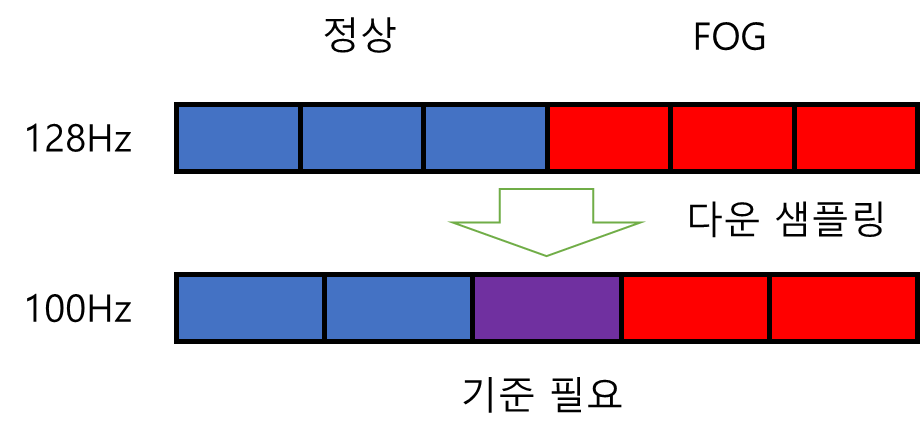

*   연속값인 가속도와 다르게 라벨링값은 범주형 데이터
*   다운샘플링을 진행 하면 경계값이 모호해짐
*   범주값 이기 때문에 정의할 규칙이 필요


1.  StartHesitation, Turn, Walking 클레스 비율 계산
2.  128과 100의 최소공배수인 3200으로 확장
3.  한 구간을 32로 슬라이싱 그 후 구간별 FOG 라벨비율을 구함
4.  선택된 라밸의 비율은 원본 비율과 최대한 비슷한 값을 가지도록 선택 비율을 조절


최대-커버리지 라벨링
전역 쿼터 일치

### 가속도, 라벨 분리

##### 데이터프레임 앞과 뒤에 fog 라벨이 있는지 확인 -> 스캐일링을 할때 정수로 떨어지도록 슬라이싱을 하기 위해

In [1]:
import pandas as pd
import numpy as np

FOG_LABELS = ["StartHesitation", "Turn", "Walking"]

def check_head_tail_25(dfs_tdcsfog: dict, labels=FOG_LABELS, n: int = 25) -> pd.DataFrame:
    """
    각 DataFrame의 앞(n)행과 뒤(n)행에서 FOG 라벨이 존재하는지 확인
    """
    rows = []
    for name, df in dfs_tdcsfog.items():
        use_labels = [c for c in labels if c in df.columns]
        row = {"id": name, "n_rows": len(df)}

        if not use_labels:
            row.update({
                "has_any_head": False, "has_any_tail": False,
                **{f"has_head_{c}": False for c in labels},
                **{f"cnt_head_{c}": 0 for c in labels},
                **{f"has_tail_{c}": False for c in labels},
                **{f"cnt_tail_{c}": 0 for c in labels},
            })
            rows.append(row)
            continue

        head = df[use_labels].head(n)
        tail = df[use_labels].tail(n)

        # 존재 여부 계산
        row["has_any_head"] = (head.values > 0).any()
        row["has_any_tail"] = (tail.values > 0).any()

        # 라벨별 카운트 기록
        for c in labels:
            if c in use_labels:
                row[f"has_head_{c}"] = bool((head[c].values > 0).any())
                row[f"cnt_head_{c}"]  = int((head[c].values > 0).sum())
                row[f"has_tail_{c}"] = bool((tail[c].values > 0).any())
                row[f"cnt_tail_{c}"]  = int((tail[c].values > 0).sum())
            else:
                row[f"has_head_{c}"] = row[f"has_tail_{c}"] = False
                row[f"cnt_head_{c}"] = row[f"cnt_tail_{c}"] = 0

        rows.append(row)

    summary = pd.DataFrame(rows).sort_values(
        ["has_any_head", "has_any_tail", "id"],
        ascending=[False, False, True]
    ).reset_index(drop=True)
    return summary


# ✅ 실행
summary_check = check_head_tail_25(dfs["tdcsfog"])

# 🔹 앞쪽 25행에서 라벨이 존재하는 DF
head_problem_ids = summary_check.loc[summary_check["has_any_head"], "id"].tolist()

# 🔸 뒤쪽 25행에서 라벨이 존재하는 DF
tail_problem_ids = summary_check.loc[summary_check["has_any_tail"], "id"].tolist()

# ---------------- 출력 정리 ----------------
print(f"✅ 전체 DF 개수: {len(summary_check)}")

print("🟦 앞 25행에 라벨이 존재하는 DF 목록:")
print(head_problem_ids[:20])  # 너무 길면 앞 20개만 보기

print("\n🟥 뒤 25행에 라벨이 존재하는 DF 목록:")
print(tail_problem_ids[:20])



NameError: name 'dfs' is not defined

In [ ]:
dfs['tdcsfog']['td_c23e55e654_df'].tail(5)

,AccV,AccML,AccAP,StartHesitation,Turn,Walking
Time,,,,,,
50886,-8.030260,-5.357509,2.507827,1,0,0
50887,-7.924130,-5.376973,2.228992,1,0,0
50888,-7.702761,-5.170810,2.146277,1,0,0
50889,-7.462286,-4.631173,2.143609,1,0,0
50890,-7.330365,-4.040548,2.338726,1,0,0


In [ ]:
dfs['tdcsfog']['td_dec1b7c109_df'].tail(5)

,AccV,AccML,AccAP,StartHesitation,Turn,Walking
Time,,,,,,
21472,-8.964148,0.003961,-4.367656,0,1,0
21473,-8.969744,0.012325,-4.369146,0,1,0
21474,-8.970224,0.012392,-4.369884,0,1,0
21475,-8.971586,0.010164,-4.381788,0,1,0
21476,-8.972484,0.007132,-4.366920,0,1,0


In [ ]:
# ✅ 실행
summary_check = check_head_tail_25(dfs["tdcsfog"], n=2)

# 🔹 앞쪽 25행에서 라벨이 존재하는 DF
head_problem_ids = summary_check.loc[summary_check["has_any_head"], "id"].tolist()

# 🔸 뒤쪽 25행에서 라벨이 존재하는 DF
tail_problem_ids = summary_check.loc[summary_check["has_any_tail"], "id"].tolist()

# ---------------- 출력 정리 ----------------
print(f"✅ 전체 DF 개수: {len(summary_check)}")

print("🟦 앞 25행에 라벨이 존재하는 DF 목록:")
print(head_problem_ids[:20])  # 너무 길면 앞 20개만 보기

print("\n🟥 뒤 25행에 라벨이 존재하는 DF 목록:")
print(tail_problem_ids[:20])

✅ 전체 DF 개수: 833
🟦 앞 25행에 라벨이 존재하는 DF 목록:
[]

🟥 뒤 25행에 라벨이 존재하는 DF 목록:
['td_c23e55e654_df', 'td_dec1b7c109_df']


In [ ]:
acc_df = tdcs_df.iloc[:,1:4]
label_df = tdcs_df.iloc[:,4:]

In [ ]:
acc_df.shape[0] * 25 % 32

11

In [ ]:
acc_df.shape[0] % 128

67

In [ ]:
acc_df

,AccV,AccML,AccAP
0,-9.495592,-0.906945,-0.336843
1,-9.488013,-0.899195,-0.337950
2,-9.492908,-0.904170,-0.343041
3,-9.501896,-0.906277,-0.338515
4,-9.495207,-0.911066,-0.343226
...,...,...,...
9150,-9.500399,-0.897989,-0.581156
9151,-9.499855,-0.922563,-0.560609
9152,-9.493016,-0.918003,-0.549131
9153,-9.526741,-0.924203,-0.544585


In [ ]:
from scipy.signal import resample_poly
acc_df
